# **Insurance Model**
### Andre Hu

[Assignment Link](https://www.ml-quant.com/22d7d1fa-38f0-49d2-814c-8b001832da16)

# **Table of Contents**
### Problem Definition
### Getting Started
### Exploratory Data Analysis
  - Categorical Features
  - Numerical Features
  - A Brief Look Into BMI

### Preparing Data for Machine Learning
### Building the Models
  - 1. Linear Regression
  - 2. Lasso
  - 3. SVR
  - 4. KNN
  - 5. Decision Tree
  - 6. Random Forest
  
### Summary

# **Problem Definition**

Building six different regression models to predict health insurance cost given a patient and their characteristics.

# **Getting Started**

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt # visualization
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Data
df = pd.read_csv('https://open-data.s3.filebase.com/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Exploratory Data Analysis**

In [ ]:
# Find any null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Find any duplicated entries
df = df.drop_duplicates()
df.shape

(1337, 7)

# Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['sex', 'smoker', 'region'], dtype='object')

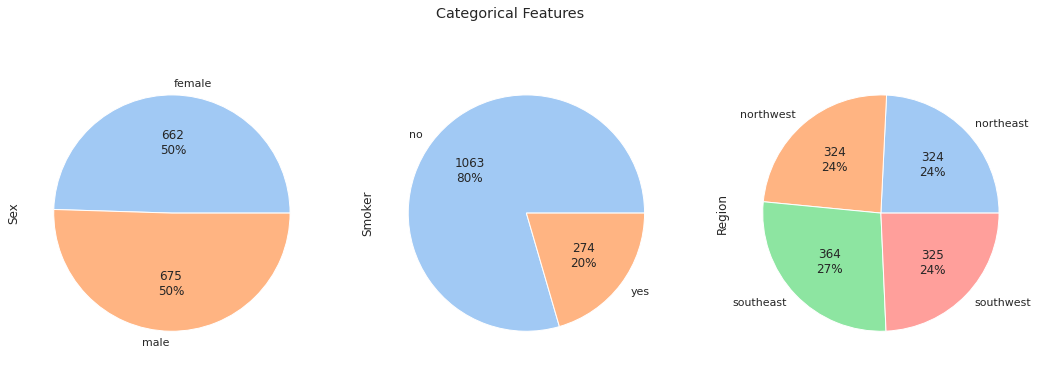

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

def label_function(val):
  return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('sex').size().plot(kind='pie', autopct=label_function, ax=ax1)
df.groupby('smoker').size().plot(kind='pie', autopct=label_function, ax=ax2)
df.groupby('region').size().plot(kind='pie', autopct=label_function, ax=ax3)

ax1.set_ylabel('Sex')
ax2.set_ylabel('Smoker')
ax3.set_ylabel('Region')

fig.suptitle('Categorical Features')

plt.show()

`sex` and `region` both seems to be almost evenly distributed. There are more nonsmokers than smokers in the dataset.

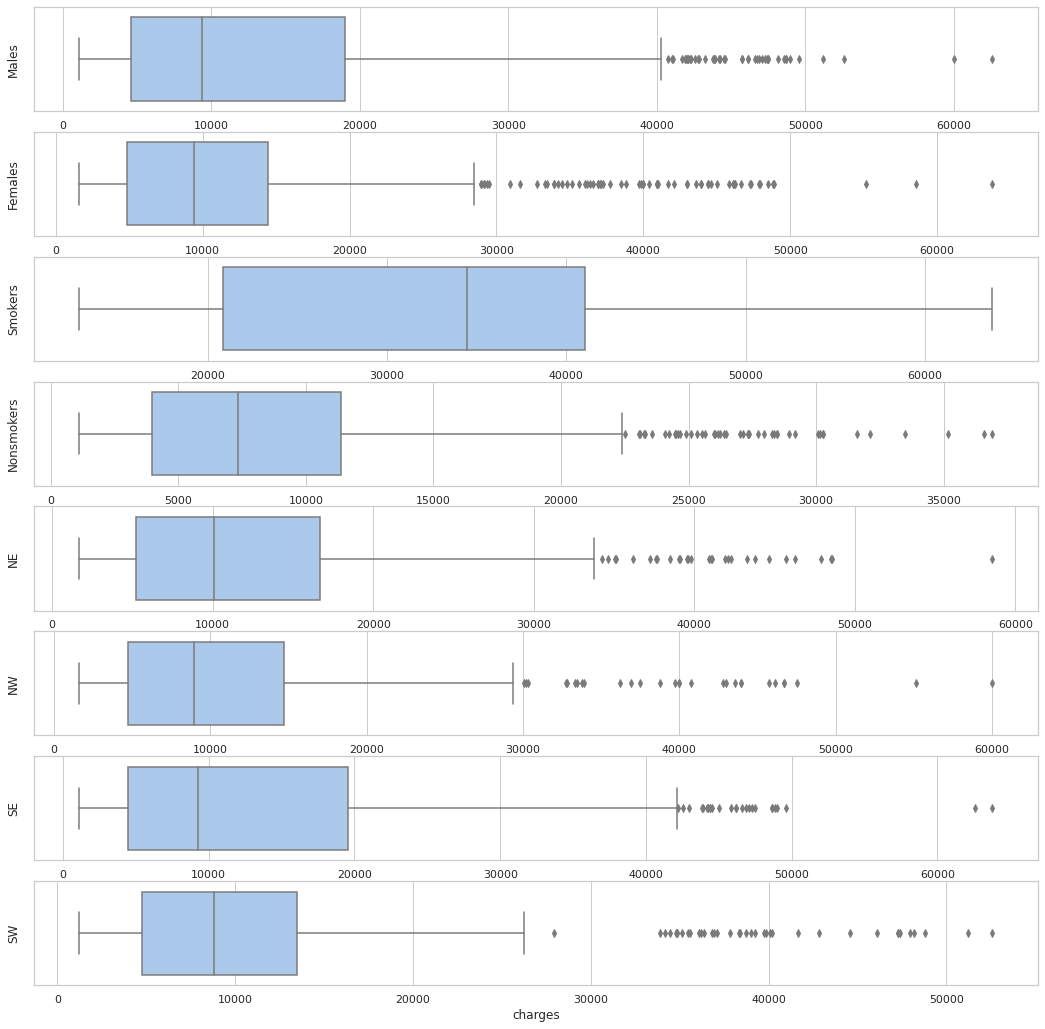

In [ ]:
df = pd.read_csv('https://open-data.s3.filebase.com/insurance.csv')

males = df.loc[df['sex'] == 'male']
females = df.loc[df['sex'] == 'female']

smokers = df.loc[df['smoker'] == 'yes']
nonsmokers = df.loc[df['smoker'] == 'no']

northeast_patients = df.loc[df['region'] == 'northeast']
northwest_patients = df.loc[df['region'] == 'northwest']
southeast_patients = df.loc[df['region'] == 'southeast']
southwest_patients = df.loc[df['region'] == 'southwest']

fig, ax = plt.subplots(nrows=8, figsize=(18, 18))

sns.boxplot(males.charges, ax=ax[0])
ax[0].set_ylabel('Males')

sns.boxplot(females.charges, ax=ax[1])
ax[1].set_ylabel('Females')

sns.boxplot(smokers.charges, ax=ax[2])
ax[2].set_ylabel('Smokers')

sns.boxplot(nonsmokers.charges, ax=ax[3])
ax[3].set_ylabel('Nonsmokers')

sns.boxplot(northeast_patients.charges, ax=ax[4])
ax[4].set_ylabel('NE')

sns.boxplot(northwest_patients.charges, ax=ax[5])
ax[5].set_ylabel('NW')

sns.boxplot(southeast_patients.charges, ax=ax[6])
ax[6].set_ylabel('SE')

sns.boxplot(southwest_patients.charges, ax=ax[7])
ax[7].set_ylabel('SW')

plt.show()

**Sex**: Costs seem to be relatively similar, though slightly higher for males

**Smoker**: A big difference in charges between smokers and nonsmokers, most likely variable that holds significant weight

**Region**: Costs also seem to be relatively similar, slightly more expensive on the eastcoast

# Numerical Features

In [ ]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


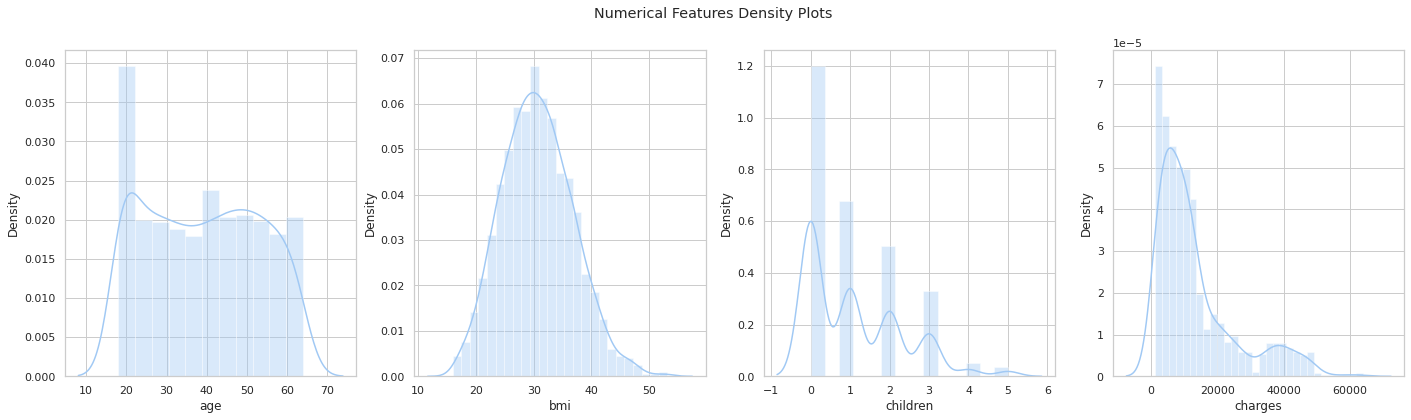

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(24, 6))

sns.distplot(df['age'], ax=ax1)
sns.distplot(df['bmi'], ax=ax2)
sns.distplot(df['children'], ax=ax3)
sns.distplot(df['charges'], ax=ax4)

fig.suptitle('Numerical Features Density Plots')
plt.show()

**Age**
Seems to be relatively equally distributed except for the fact of a very high amount of younger patients

**BMI**
- Has a small amount of outliers, indicate several patients of extreme obesity
- Follows a normal distribution, might need to be scaled

**Children**
- Slightly right skewed however range is small, might scale for models
- Low range (0 - 5) might not provide significant information
- Seems to follow the distribution of charges, might not be related

**Charges**
- Has many outliers, find out what features correlate to the high charges
- Right skewed distribution, might need log transformation for models

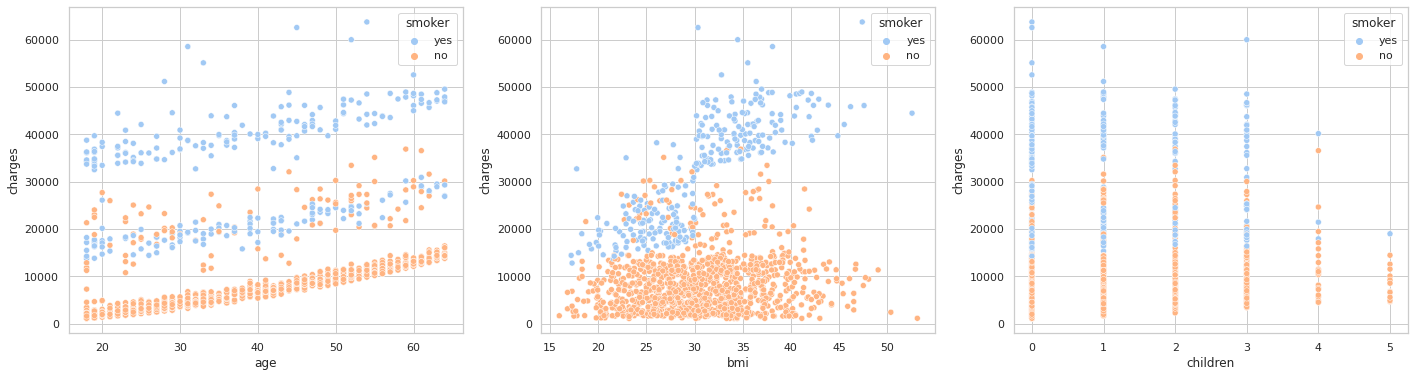

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))

sns.scatterplot(x=df.age, y=df.charges, hue=df.smoker, ax=ax1)
sns.scatterplot(x=df.bmi, y=df.charges, hue=df.smoker, ax=ax2)
sns.scatterplot(x=df.children, y=df.charges, hue=df.smoker, ax=ax3)

plt.show()

**Age**

There seems to be a relatively linear correlation between `age` and `charges`. The added hue of `smoker` shows a clear increase in `charges` for the patient no matter the age.

**BMI**

There does not seems to be a clear pattern of linearity in all the BMI; the points seem generally scattered around. Similar to `age`, smoker charges are generally higher despite `bmi`.

**Children**

Though not entirely visible in this graph, this feature follows the same patterns as the ones before with it's max `charges` being those who are smokers.

NOTE: The graphs with `sex` and `region` do not show as clear definitions than with `smoker`.

### **A Brief Look Into BMI**

The CDC has [guidelines](https://www.cdc.gov/obesity/adult/defining.html) indicating a person's health based on their body mass index.

- If your BMI is less than 18.5, it falls within the **underweight** range
- If your BMI is 18.5 to <25, it falls within the **healthy** weight range
- If your BMi is 25.0 <30, it falls within the **overweight** range
- If your BMI is 30.0 or higher, it falls within the **obesity** range

The CDC also splits obesity into three classes:

- Class 1: BMI of 30 to < 35
- Class 2: BMI of 35 to < 40
- Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “severe” obesity.

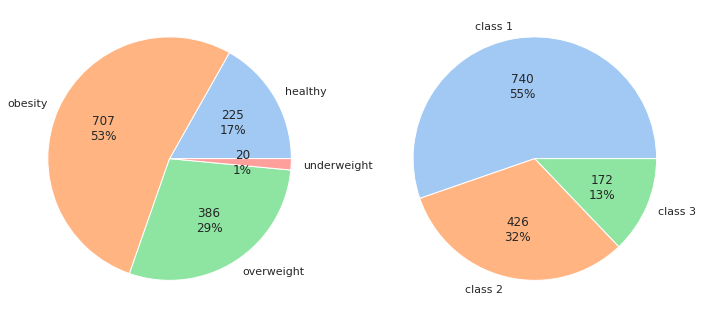

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 12))

# Initial Categories
bmi = df['bmi']
conditions = [bmi < 18.5, bmi < 25, bmi < 30, bmi >= 30]
labels = ['underweight', 'healthy', 'overweight', 'obesity']
df['bmi_label'] = np.select(conditions, labels)

df.groupby('bmi_label').size().plot(
    kind='pie', 
    ylabel='', 
    autopct=label_function,
    ax=ax1
    )

# Classes of Obesity
filtered_df = df.loc[df['bmi_label'] == 'obesity']

bmi = filtered_df['bmi']
conditions = [bmi < 35, bmi < 40, bmi >= 40]
labels = ['class 1', 'class 2', 'class 3']

filtered_df['bmi_label'] = np.select(conditions, labels)
filtered_df.groupby('bmi_label').size().plot(
    kind='pie', 
    ylabel='', 
    autopct=label_function,
    ax=ax2
    )
plt.show()

- The majority of clients are classified as obese, may indicate a higher average insurance cost than if it was evenly distributed


Depending on the performance of the models, we can use an encoded form of `bmi_label` for the models instead.


# **Preparing Data for Machine Learning**

In order to fit categorical data into our model, we can convert them into numbers.
For `sex` and `smoker` feature, we can replace the values in the column as their only options are binary.

For `region` however, we will use pandas' `get_dummies()` to create new columns to indicate the region.

Based on previous categories from the CDC and `bmi`, we will also modify `bmi_label` to indicate the category of health.

In [ ]:
# Converting categorical to numerical entries

# Split region into seperate columns using One Hot encoding
df = pd.get_dummies(df, columns=['region'], prefix='R')

# Label encoding
df['sex'].replace(['male', 'female'], [1, 0], inplace=True)
df['smoker'].replace(['yes', 'no'], [1, 0], inplace=True)
df['bmi_label'].replace(['underweight', 'healthy', 'overweight', 'obesity'], [0, 1, 2, 3], inplace=True)

# Put charges as first col
cols = ['charges'] + [col for col in df if col != 'charges']
df = df[cols]

df.head()

,charges,age,sex,bmi,children,smoker,bmi_label,R_northeast,R_northwest,R_southeast,R_southwest
0,16884.92400,19,0,27.900,0,1,2,0,0,0,1
1,1725.55230,18,1,33.770,1,0,3,0,0,1,0
2,4449.46200,28,1,33.000,3,0,3,0,0,1,0
3,21984.47061,33,1,22.705,0,0,1,0,1,0,0
4,3866.85520,32,1,28.880,0,0,2,0,1,0,0


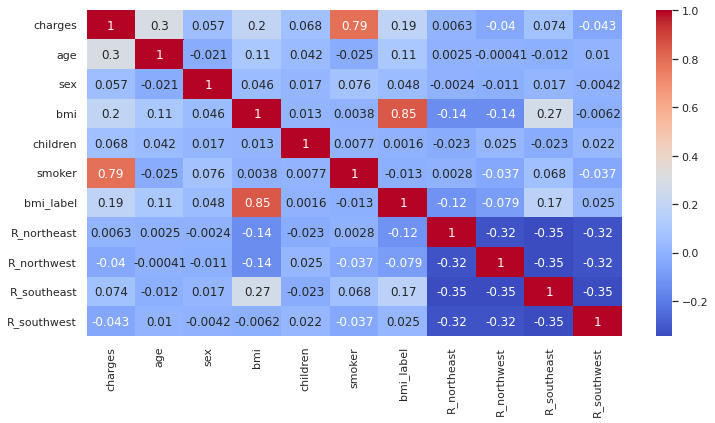

In [ ]:
# Comparing all categories
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='coolwarm', ax=ax, annot=True)
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges        1.000000
smoker         0.787251
age            0.299008
bmi            0.198341
bmi_label      0.186774
R_southeast    0.073982
children       0.067998
sex            0.057292
R_northeast    0.006349
R_northwest   -0.039905
R_southwest   -0.043210
Name: charges, dtype: float64

- There seems to be a very strong correlation for `smoker` and a weaker one for `age`
- Nothing else seems to be of high significance

It can also be noted that `bmi` and `bmi_label` are relatively similar. For the models, the two features may be able to be used interchangebly and help reduce compute time.

Depending on the model, we can use decide on which features to use. Each model may not use all of the columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   charges      1338 non-null   float64
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   int64  
 3   bmi          1338 non-null   float64
 4   children     1338 non-null   int64  
 5   smoker       1338 non-null   int64  
 6   bmi_label    1338 non-null   int64  
 7   R_northeast  1338 non-null   uint8  
 8   R_northwest  1338 non-null   uint8  
 9   R_southeast  1338 non-null   uint8  
 10  R_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 78.5 KB


# **Building The Models**


For the models, we will be splitting the data 80-20, using 80% of entries for training, and 20% for testing.

We will also hypertune parameters using `GridSearchCV` with a k-fold cross validation with k=5.



In [ ]:
from sklearn.model_selection import train_test_split # Creating train/test sets
from sklearn.model_selection import GridSearchCV # Tune parameters for models

# Help understand element of error, we'll be using RMSE
# from sklearn.metrics import r2_score # Using model.score instead
from sklearn.metrics import mean_squared_error
from math import sqrt

The code below was used to find what dimensions worked best with the models. A dimension reduction algorithm could have been used but due to the low number of features, we could select variables based off of the EDA.

Based on the correlations earlier, `smoker` was a significant feature that lead to more accurate models.

In [ ]:
from itertools import combinations

# labels = ['age', 'sex', 'bmi_label', 'smoker']
labels = [d for d in df.columns if d != 'charges']

label_combos = []
for i in range(1, len(labels)):
  for j in combinations(labels, i):
    label_combos.append(list(j))

# label_combos

Certain models are also known to perform better when variables are scaled.

We will create a `scaled_df` below.

For the sake of normalizing model outputs (to graph/compare), the target variable `charges` will not be scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_df = pd.DataFrame.copy(df)

scaler = StandardScaler()
features_to_scale = ['age', 'bmi', 'children']
scaled_df[features_to_scale] = scaler.fit_transform(scaled_df[features_to_scale])

scaled_df.head()

,charges,age,sex,bmi,children,smoker,bmi_label,R_northeast,R_northwest,R_southeast,R_southwest
0,16884.92400,-1.438764,0,-0.453320,-0.908614,1,2,0,0,0,1
1,1725.55230,-1.509965,1,0.509621,-0.078767,0,3,0,0,1,0
2,4449.46200,-0.797954,1,0.383307,1.580926,0,3,0,0,1,0
3,21984.47061,-0.441948,1,-1.305531,-0.908614,0,1,0,1,0,0
4,3866.85520,-0.513149,1,-0.292556,-0.908614,0,2,0,1,0,0


We will also create a `KFold` object for `GridSearchCV`

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

## **1. Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

Because the number of features and low and linear regression models are relatively fast, we can find the best features to use.

In [ ]:
def findLinRegScore(columns):

  # x = scaled_df.drop('charges', axis=1)
  x = scaled_df[columns]
  y = scaled_df.charges

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

  linear_model = LinearRegression()
  linear_model.fit(x_train, y_train)

  training_score = linear_model.score(x_train, y_train)
  test_score = linear_model.score(x_test, y_test)
  return training_score, test_score


In [ ]:
train_scores = []
test_scores = []

for i in range(len(label_combos)):
  train, test = findLinRegScore(label_combos[i])
  train_scores.append(train)
  test_scores.append(test)

max_test = max(test_scores)
i = test_scores.index(max_test)

print(max_test)
print(label_combos[i])

0.7640206507283378
['age', 'bmi', 'children', 'smoker', 'bmi_label', 'R_southeast', 'R_southwest']


It doesn't really make sense to only include two of the four `region` features, so we'll remove them for now. The best features to use are `age`, `smoker`, and `bmi_label`.

In [ ]:
x = scaled_df[['age', 'smoker', 'bmi_label']]
y = scaled_df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

print(f'Train Score: {linear_model.score(x_train, y_train)}')
print(f'Test Score: {linear_model.score(x_test, y_test)}')

Train Score: 0.7463862221327027
Test Score: 0.7543590024335032


The models' test scores are similar. Because the linear regression is remains a straight line, this is as good as it gets.

There is a slight underfit as the test score is higher than the train score.

In [ ]:
train_preds = linear_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
print(f'Train RMSE: {sqrt(mse)}')

test_preds = linear_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
print(f'Test RMSE: {sqrt(mse)}')

Train RMSE: 6081.882701979326
Test RMSE: 6055.530136264158


## **2. Lasso**

In [ ]:
from sklearn.linear_model import Lasso

x = df.drop('charges', axis=1)
y = df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

lasso_model = Lasso(alpha=0.2, normalize=True)

lasso_model.fit(x_train, y_train)


Lasso(alpha=0.2, normalize=True)

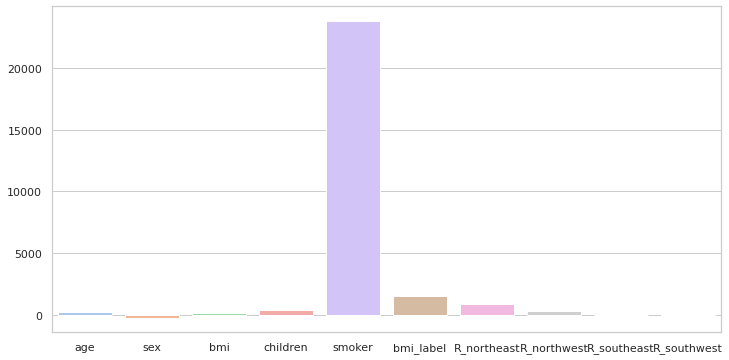

In [ ]:
lasso_coef = lasso_model.coef_

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=df.columns.drop('charges'), y=lasso_coef, ax=ax)
plt.show()

Based on the Lasso regression, it seems that smoker carriers a significant weight for charges. We can use that information for the other models incase there is a need to reduce features

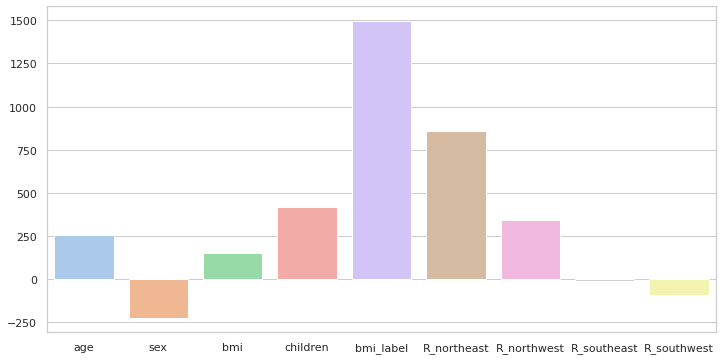

In [ ]:
# Graph without `smoker`
fig, ax = plt.subplots(figsize=(12, 6))

lasso_coef_no_smoker = np.delete(lasso_coef, 4)

sns.barplot(x=df.columns.drop(['charges', 'smoker']), y=lasso_coef_no_smoker, ax=ax)
plt.show()

In [ ]:
print(f'Train Score: {lasso_model.score(x_train, y_train)}')
print(f'Test Score: {lasso_model.score(x_test, y_test)}')

Train Score: 0.7505055421038483
Test Score: 0.7636440977431932


Very well-fitted model.

In [ ]:
train_preds = lasso_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
print(f'Train RMSE: {sqrt(mse)}')

test_preds = lasso_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
print(f'Test RMSE: {sqrt(mse)}')

Train RMSE: 6032.28802409963
Test RMSE: 5939.97982021249


## **3. Support Vector Machine**

In [ ]:
from sklearn.svm import SVR # support vector regression

In [ ]:
# Create our train and test datasets
x = scaled_df[['age', 'smoker', 'bmi_label']]
y = scaled_df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

**Parameters**
- `gamma`: determining how many elements near the vector we want to include

- `C`: how much we want to avoid misclassifying each training sample
  - small value will be more relaxed
  - high value is results in higher regularization

- `degree`: Polynomial that would draw our boundary. For more features we would most likely need a higher degree

- `kernel`: determine shape of hyperplane used for svm


[Finding Optimal C](https://stats.stackexchange.com/questions/43943/which-search-range-for-determining-svm-optimal-c-and-gamma-parameters)


In [ ]:
parameters = {
  "kernel":['rbf'],
  "gamma":[0.0001, 0.001, 0.01, 0.1, 1],
  "degree": range(1, 10),
  "C":[0.1, 1, 10, 100, 1000]
}

gridsearch = GridSearchCV(SVR(), parameters, cv=kf)
gridsearch.fit(x_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'C': 1000, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.8215250810431367


In [ ]:
svr_model = SVR(C=1000, degree=1, gamma=1, kernel='rbf')

svr_model.fit(x_train, y_train)

print(f'Train Score: {svr_model.score(x_train, y_train)}')
print(f'Test Score: {svr_model.score(x_test, y_test)}')

Train Score: 0.833926149512347
Test Score: 0.8368994787047795


Slight underfit in the model but scores are relatively close.

In [ ]:
train_preds = svr_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
print(f'Train RMSE: {sqrt(mse)}')

test_preds = svr_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
print(f'Test RMSE: {sqrt(mse)}')

Train RMSE: 4914.9598041964155
Test RMSE: 4959.842424143019


## **4. KNN Regression**

For a KNN regression, we're going to apply some more data preparation by scaling the features. Because `age` and `bmi` has a standard distribution, we will use sklearn's `StandardScaler`.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

When too many features were put into the model, the number of dimensions were too high and continued in producing poor results.

The selected features `age`, `smoker`, and `bmi_label` produced good results.

In [ ]:
# Create our train and test datasets
x = scaled_df[['age', 'smoker', 'bmi_label']]
y = scaled_df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

**Parameters**
- `n_neighbors`: number of neighbors we want to use for classification
- `weights`: how we calculate the value of each neighbor
  - `uniform`: all points are the same
  - `distance`: closer points are weighed higher

In [ ]:
# Hypertune parameters using different k-neighbors as well as distance calculations
parameters = {
    "n_neighbors": range(1, 100),
    "weights": ["uniform", "distance"]
}

# Perform a grid search with 5-fold cross validation
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters, cv=kf)
gridsearch.fit(x_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'n_neighbors': 24, 'weights': 'uniform'}
0.8466045803471076


We can create a graph to show how changing `n_neighbor` affects the model. It gives us a nice demonstration on how strict classifying with not enough or too many neighbors will reduce model accuracy. 

The max score is not the same as the gridsearch for the number of neighbors because of the additional cross fold validation. The code below simply uses the data provided.

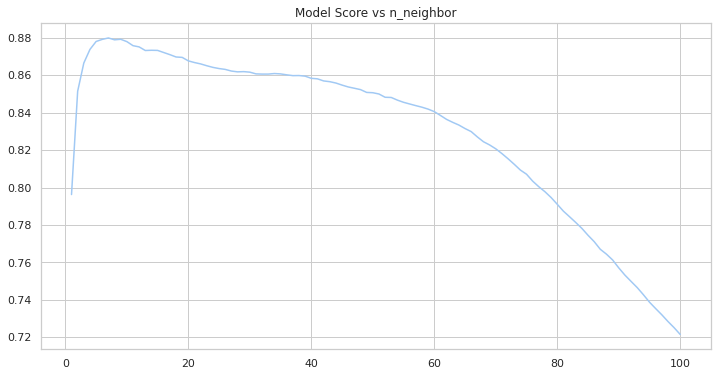

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(1, 101)

knn_scores = []
for i in range(1, 101):
  model = KNeighborsRegressor(n_neighbors=i)
  model.fit(x_train, y_train)
  knn_scores.append(model.score(x_train, y_train))
y = np.array(knn_scores)

sns.lineplot(x, y, ax=ax).set(title='Model Score vs n_neighbor')
plt.show()

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=24, weights='uniform')

knn_model.fit(x_train, y_train)

print(f'Train Score: {knn_model.score(x_train, y_train)}')
print(f'Test Score: {knn_model.score(x_test, y_test)}')

Train Score: 0.8606203211574877
Test Score: 0.8586944457787107


In [ ]:
train_preds = knn_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
print(f'Train RMSE: {sqrt(mse)}')

test_preds = knn_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
print(f'Test RMSE: {sqrt(mse)}')

Train RMSE: 4502.659153930929
Test RMSE: 4616.574207335276


Results look pretty good. The train and test scores were close to each other, indicating that the model is a good fit.

## **5. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create our train and test datasets
x = scaled_df[['age', 'sex', 'smoker', 'bmi_label', 'R_northeast', 'R_northwest', 'R_southeast', 'R_southwest']]
y = scaled_df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Notice we're not using `bmi`, instead using `bmi_label`. For a decision tree, using `bmi_label` instead reduces the need to calculate stumps in a wider range, limiting it to only 4 possibilities.


**Parameters**
- `criterion`: how error is calculated
- `max_depth`: number of layers for the decision tree
- `min_samples_split`: minimum number of samples needed to split a node
- `min_samples_leaf`: minimum number of samples needed for a leaf


In [ ]:
parameters = {
    "criterion": ['squared_error', 'friedman_mse'],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 40),
    "min_samples_leaf":range(1, 20)
}

gridsearch = GridSearchCV(DecisionTreeRegressor(), parameters, cv=kf)
gridsearch.fit(x_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'criterion': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 27}
0.8347914480060176


In [ ]:
tree_model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=27
)

tree_model.fit(x_train, y_train)

print(f'Train Score: {tree_model.score(x_train, y_train)}')
print(f'Test Score: {tree_model.score(x_test, y_test)}')

Train Score: 0.8547522327942387
Test Score: 0.8888221582792933


The model is slightly overfitted but not significant. Scores are relatively close to each other.

In [ ]:
train_preds = tree_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
print(f'Train RMSE: {sqrt(mse)}')

test_preds = tree_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
print(f'Test RMSE: {sqrt(mse)}')

Train RMSE: 4589.70544533527
Test RMSE: 4107.986268755894


In [ ]:
from sklearn.tree import export_text
print(export_text(tree_model))

|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.23
|   |   |--- feature_0 <= -1.19
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- value: [2410.87]
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- value: [4149.53]
|   |   |--- feature_0 >  -1.19
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- value: [5983.10]
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- value: [7792.29]
|   |--- feature_0 >  0.23
|   |   |--- feature_0 <= 0.88
|   |   |   |--- feature_0 <= 0.52
|   |   |   |   |--- value: [9420.49]
|   |   |   |--- feature_0 >  0.52
|   |   |   |   |--- value: [10795.94]
|   |   |--- feature_0 >  0.88
|   |   |   |--- feature_0 <= 1.37
|   |   |   |   |--- value: [13044.91]
|   |   |   |--- feature_0 >  1.37
|   |   |   |   |--- value: [15468.07]
|--- feature_2 >  0.50
|   |--- feature_3 <= 2.50
|   |   |--- feature_0 <= 0.38
|   |   |   |--- feature_0 <= -0.62
|   |   |   |   |--- value: [17679.89]
|   |   |   |--- feature_0 >  -0.62
|   |   |   |   |-

## **6. Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestRegressor

Similar to the decision tree, the random forest is creating a bunch of random decision trees and averaging all it's predictions. 

In [ ]:
# Create our train and test datasets
x = scaled_df[['age', 'sex', 'smoker', 'bmi_label', 'R_northeast', 'R_northwest', 'R_southeast', 'R_southwest']]
y = scaled_df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

**parameters**
- `n_estimators`: number of random decision trees created

In [ ]:
parameters = {
  "n_estimators": range(50, 600, 25)
}

# We're going to use the previous decision tree's parameters to help with the random forest
gridsearch = GridSearchCV(RandomForestRegressor(max_depth=5, min_samples_leaf=17, min_samples_split=3), parameters, cv=kf)
gridsearch.fit(x_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'n_estimators': 75}
0.8403015450289015


In [ ]:
forest_model = RandomForestRegressor(max_depth=5, min_samples_leaf=17, min_samples_split=3, n_estimators=75)

forest_model.fit(x_train, y_train)

print(f'Train Score: {forest_model.score(x_train, y_train)}')
print(f'Test Score: {forest_model.score(x_test, y_test)}')

Train Score: 0.8579356151687757
Test Score: 0.8936456871341422


The model is slightly overfitted but not significant.

In [ ]:
train_preds = forest_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
print(f'Train RMSE: {sqrt(mse)}')

test_preds = forest_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
print(f'Test RMSE: {sqrt(mse)}')

Train RMSE: 4539.130716972597
Test RMSE: 4017.8842103173915


# **Summary**

|          | Test Score | Train Score | Test RMSE | Train RMSE |
|   ---    |   ---    |   ---    |   ---    |   ---    |
| Linear | 0.7653 | 0.7428 | 6215.70 | 5510.06 |
| Lasso | 0.7540 | 0.7508 | 5640.60 | 6118.49 |
| SVR | 0.8583 | 0.8279 | 4573.11 | 5015.70 |
| KNN | 0.8557 | 0.8606 |  4616.57 | 4606.20 |
| Tree | 0.8888 | 0.8548 | 4107.99 | 4589.71 |
| Forest | 0.8936 | 0.8579 | 4017.88 | 4539.13 |

The best performing model was SVR. The best fitting model was Lasso.